# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Fazlu Rachman
- Email: fazrlu9575gmail.com
- Id Dicoding: A429YBf167

## Persiapan

### Menyiapkan library yang dibutuhkan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import os
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

### Menyiapkan data yang akan diguankan

In [4]:
# Load dataset
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Colab Notebooks/dataset/employee_data.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


## Data Understanding
Tahap ini bertujuan untuk memahami karakteristik dataset melalui eksplorasi data.

### Menampilkan jumlah baris dan kolom pada dataset

In [5]:
df.shape

(1470, 35)

### Menampilkan informasi tentang tipe data setiap kolom, jumlah data non-null, dan penggunaan memori

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

### Menampilkan statistik deskriptif seperti mean, standar deviasi, minimum, maksimum, dan kuartil untuk kolom numerik

In [7]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Menampilkan jumlah baris duplikat

In [8]:
df.duplicated().sum()

np.int64(0)

### Menghitung jumlah missing value pada setiap kolom

In [9]:
df.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


### Visualisasi Data

#### Distribusi Attrition

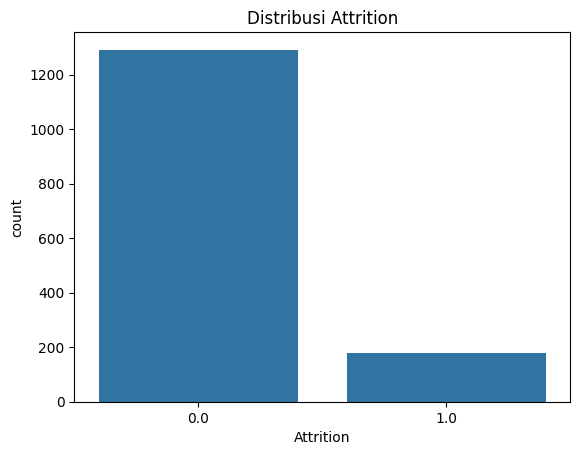

Interpretasi:
Dari visualisasi di atas, terlihat bahwa jumlah karyawan yang tidak resign jauh lebih banyak daripada yang resign.
Ini menunjukkan bahwa dataset memiliki imbalance class, yang perlu diatasi pada tahap preprocessing.


In [41]:
sns.countplot(x='Attrition', data=df)
plt.title('Distribusi Attrition')
plt.show()

print("Interpretasi:")
print("Dari visualisasi di atas, terlihat bahwa jumlah karyawan yang tidak resign jauh lebih banyak daripada yang resign.")
print("Ini menunjukkan bahwa dataset memiliki imbalance class, yang perlu diatasi pada tahap preprocessing.")

#### Visualisasi Korelasi Antar Fitur

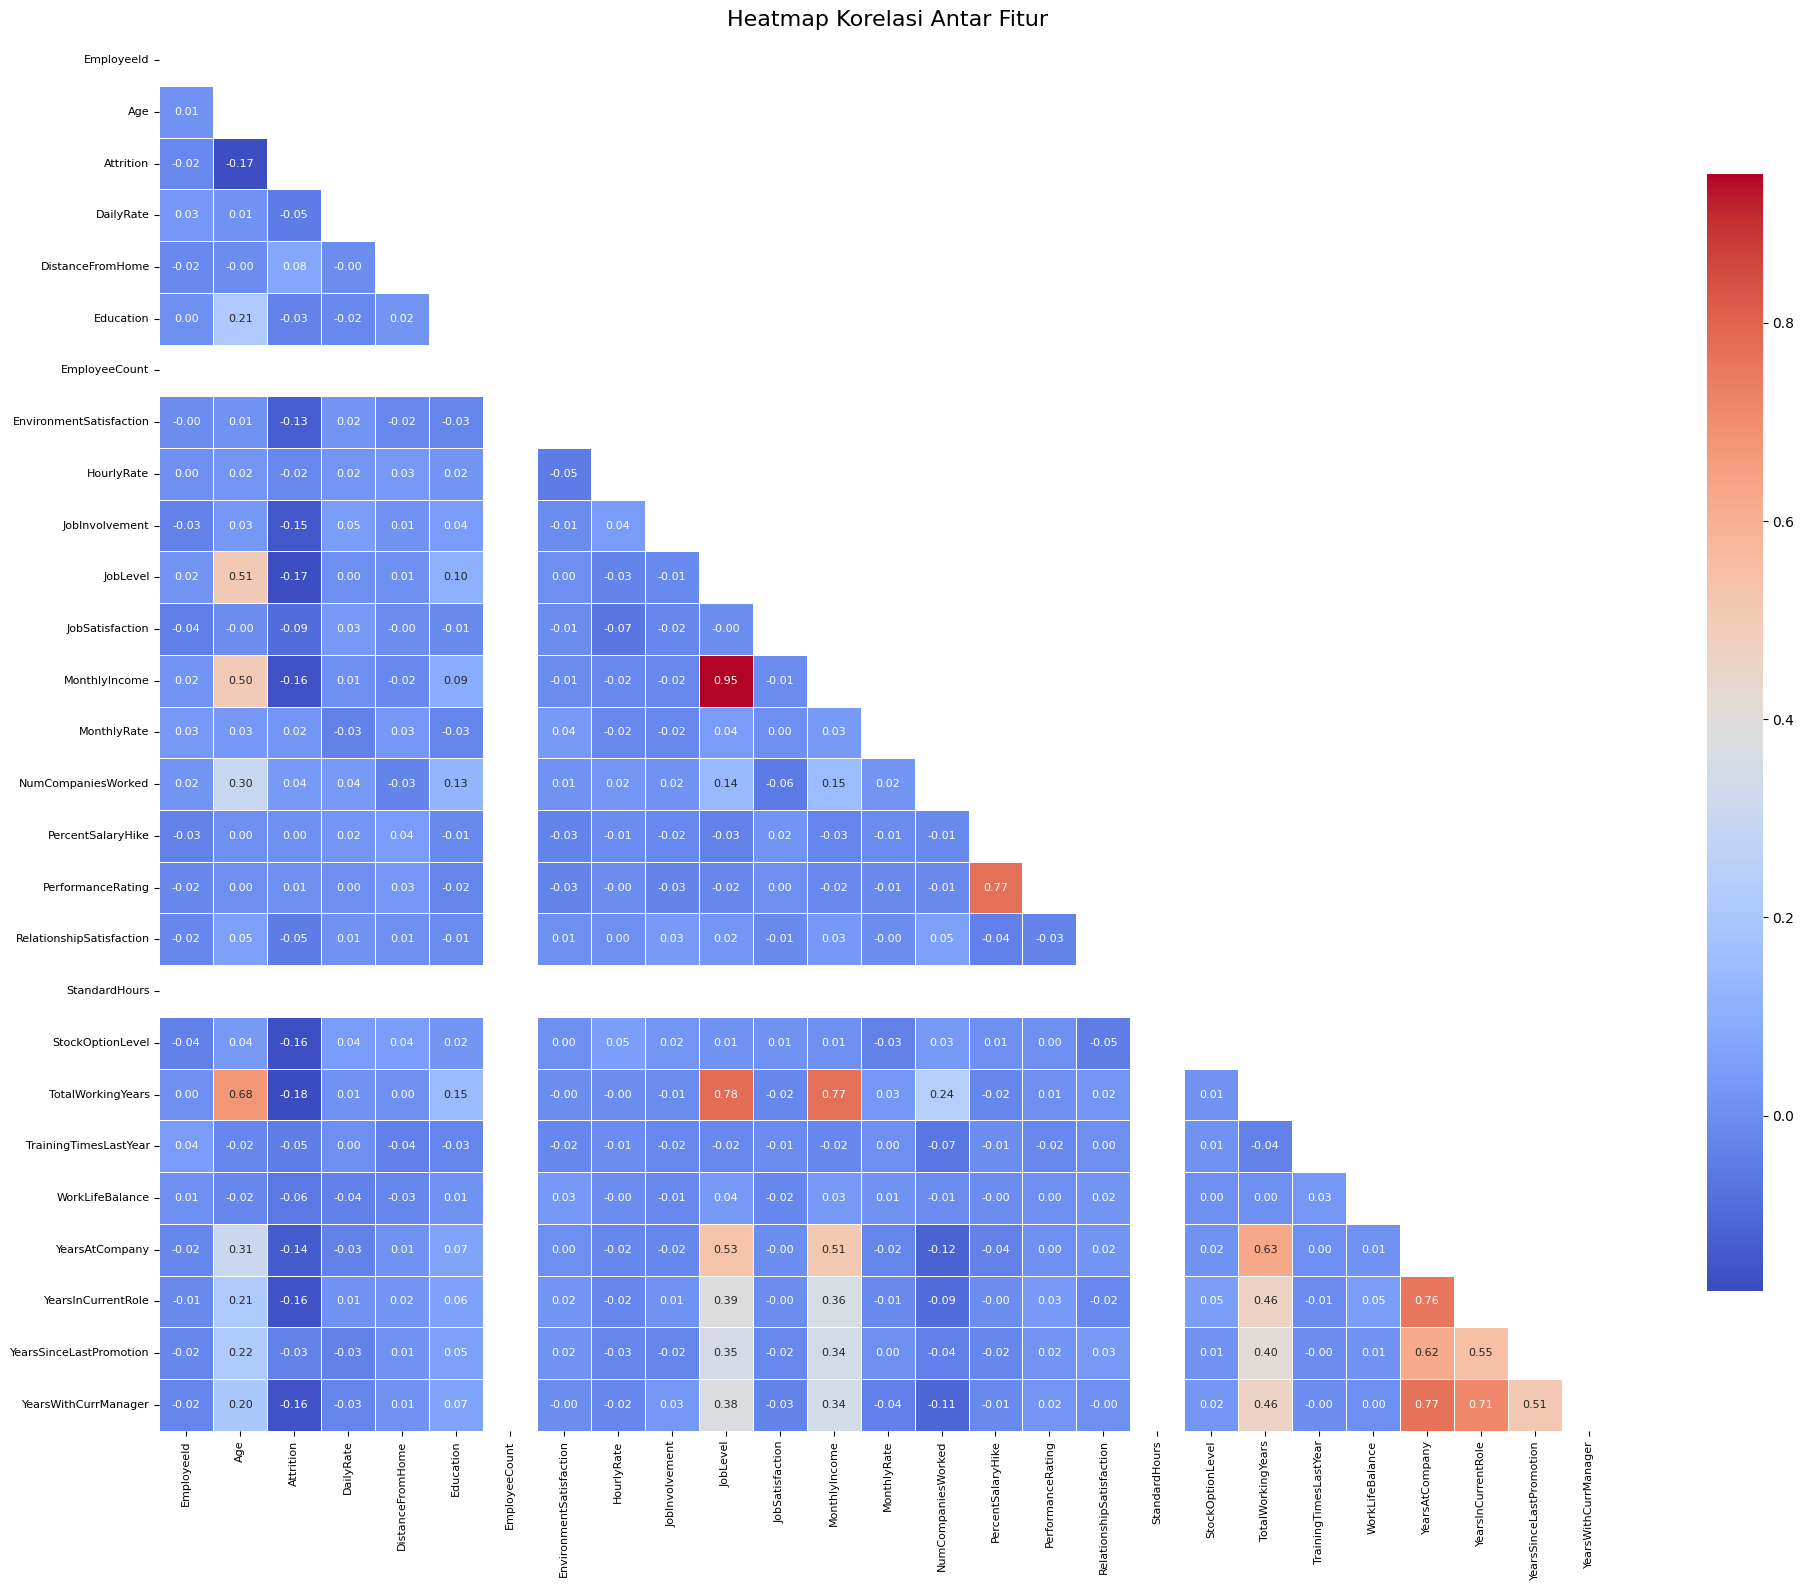

In [11]:
# Pilih hanya fitur numerik
numerical_df = df.select_dtypes(include=np.number)

# Hitung korelasi
corr = numerical_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20, 16))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    annot_kws={"size": 8},
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Heatmap Korelasi Antar Fitur', fontsize=16)
plt.xticks(rotation=90, ha='center', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

#### Visualisasi Distribusi Data Numerik

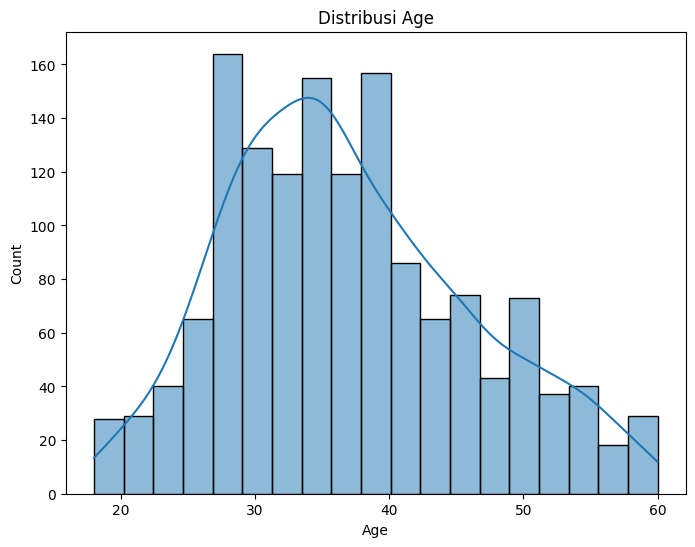

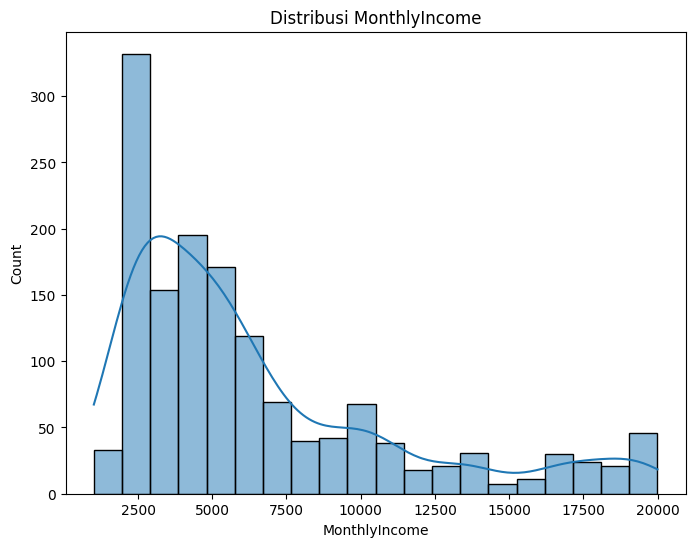

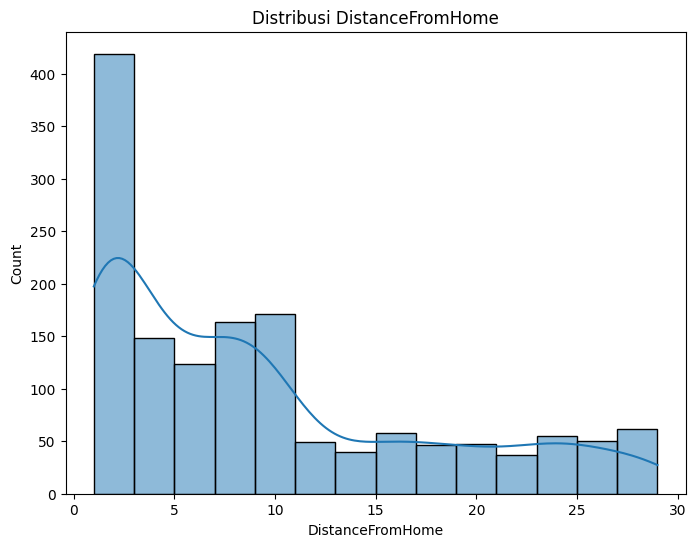

In [12]:

numerical_features = ['Age', 'MonthlyIncome', 'DistanceFromHome']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribusi {feature}')
    plt.show()

#### Analisis Outlier

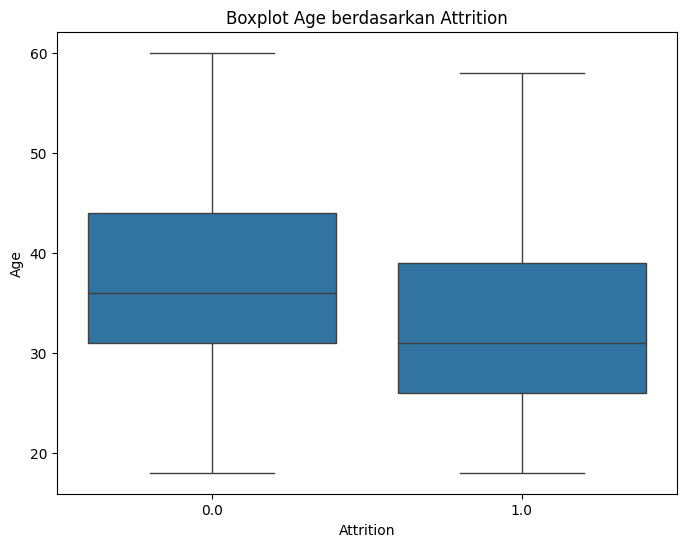

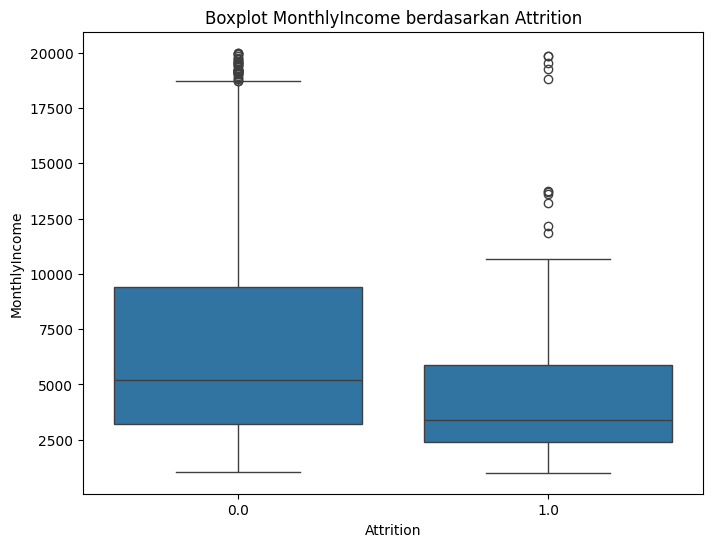

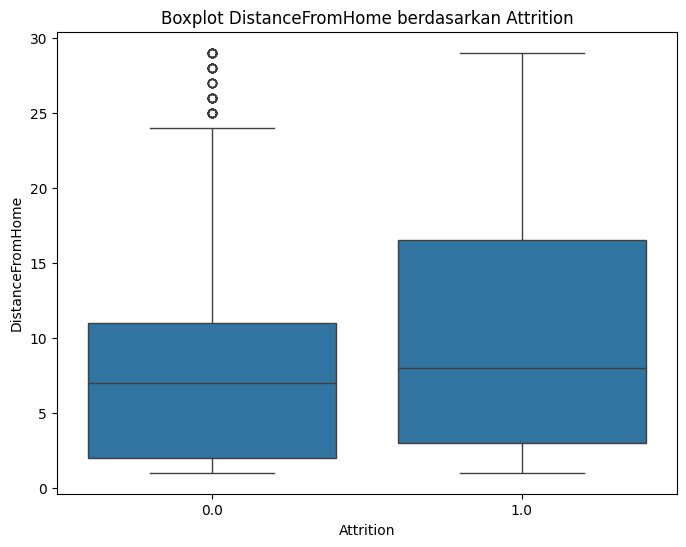

In [13]:
numerical_features = ['Age', 'MonthlyIncome', 'DistanceFromHome']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Attrition', y=feature, data=df)
    plt.title(f'Boxplot {feature} berdasarkan Attrition')
    plt.show()

#### Visualisasi Proporsi Attrition

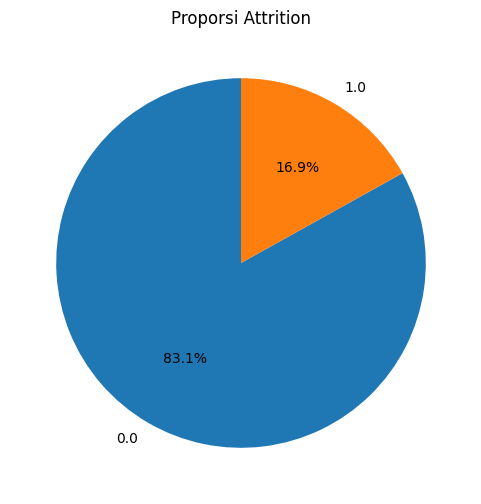

In [14]:
attrition_counts = df['Attrition'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Attrition')
plt.show()

#### Visualisasi Fitur Kategorikal terhadap Attrition

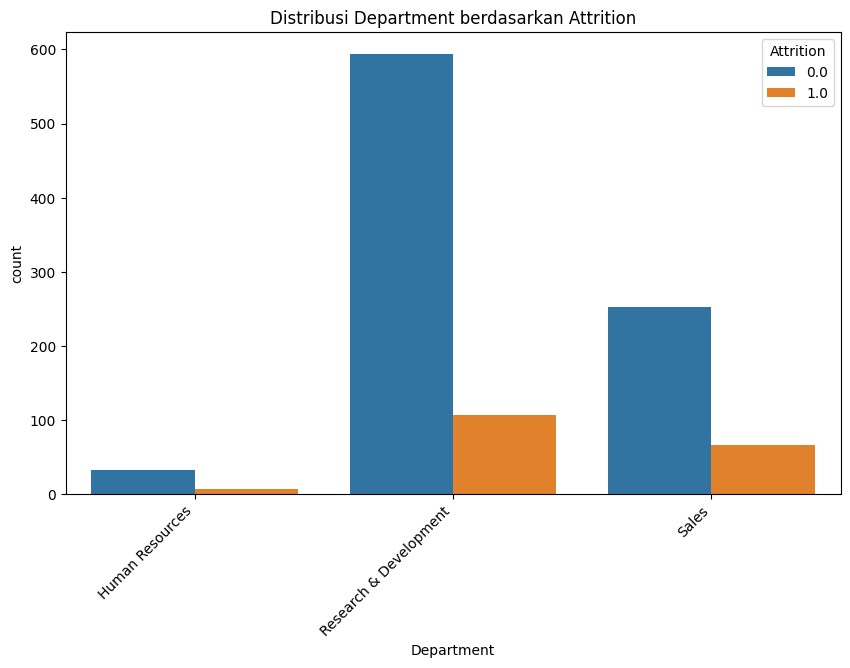

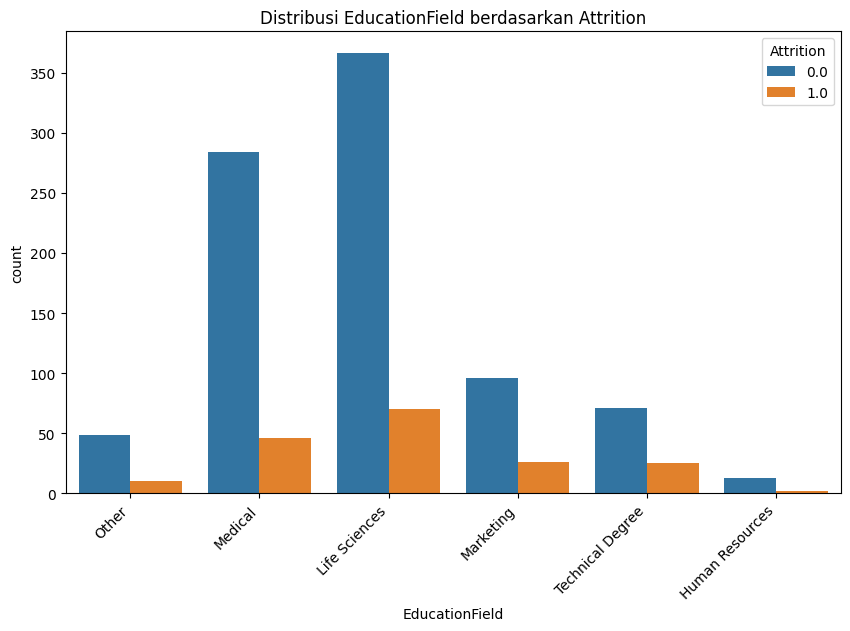

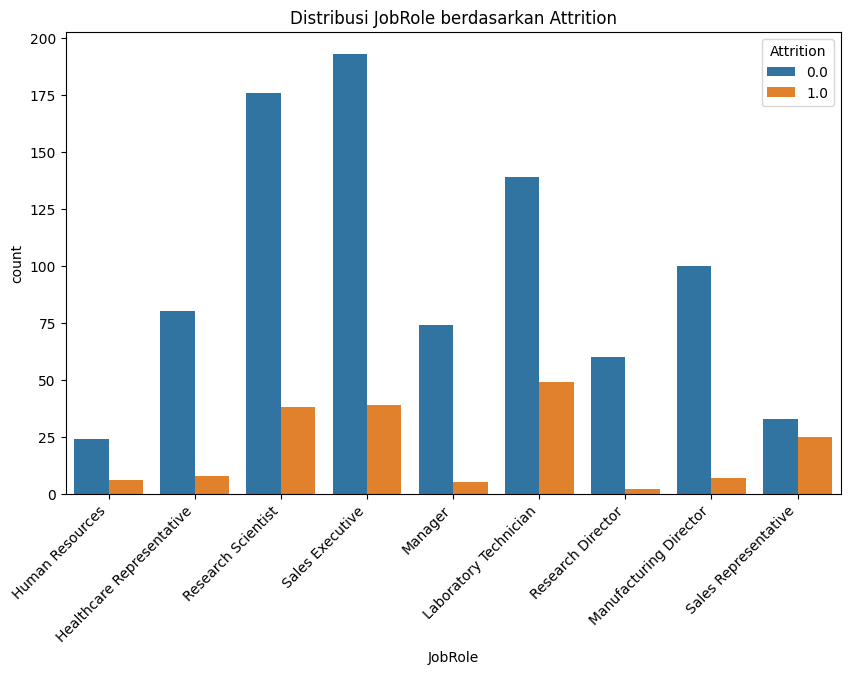

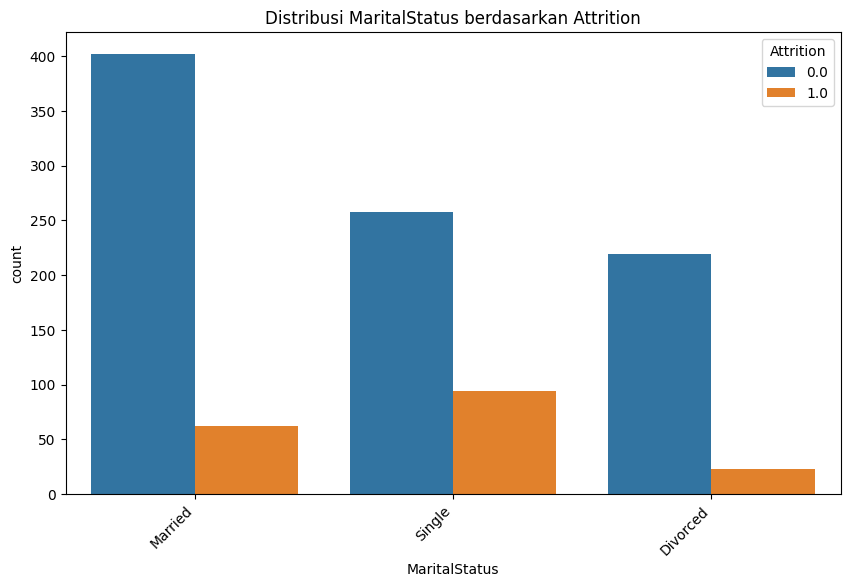

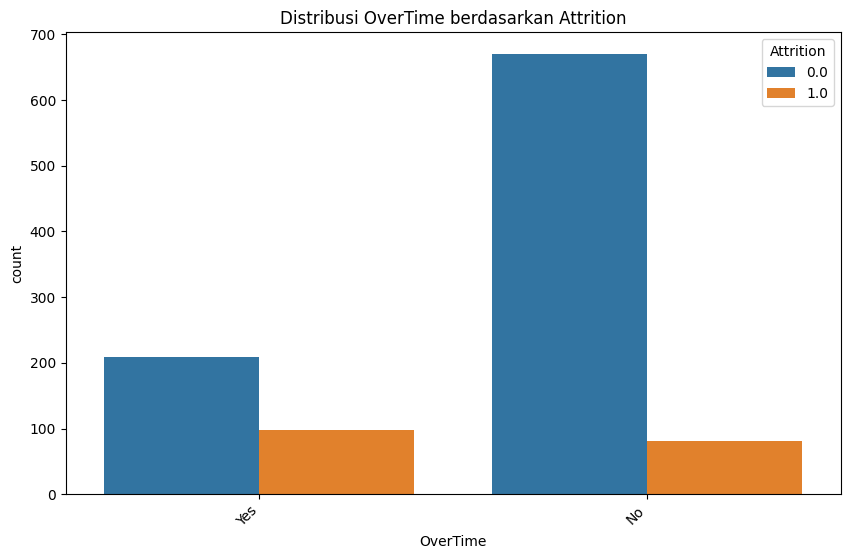

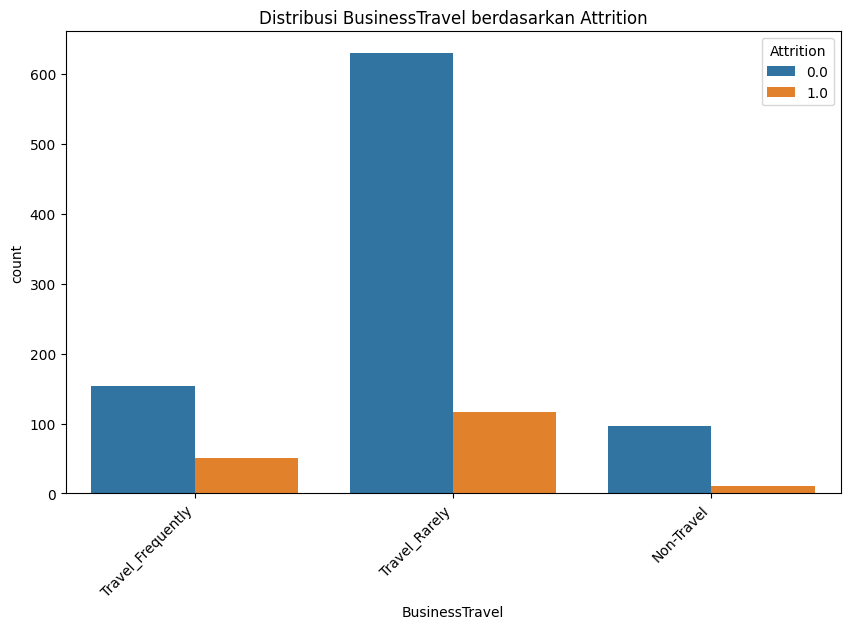

In [15]:
categorical_features = ['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime', 'BusinessTravel']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Attrition', data=df)
    plt.title(f'Distribusi {feature} berdasarkan Attrition')
    plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar tidak tumpang tindih
    plt.show()

#### Eksplorasi Hubungan Antar Fitur Kategorikal dengan Attrition

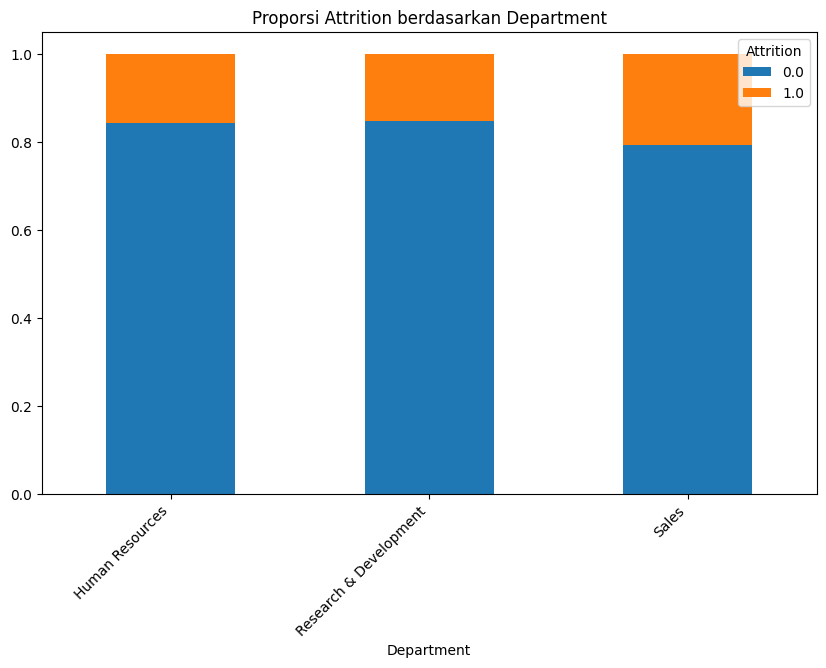

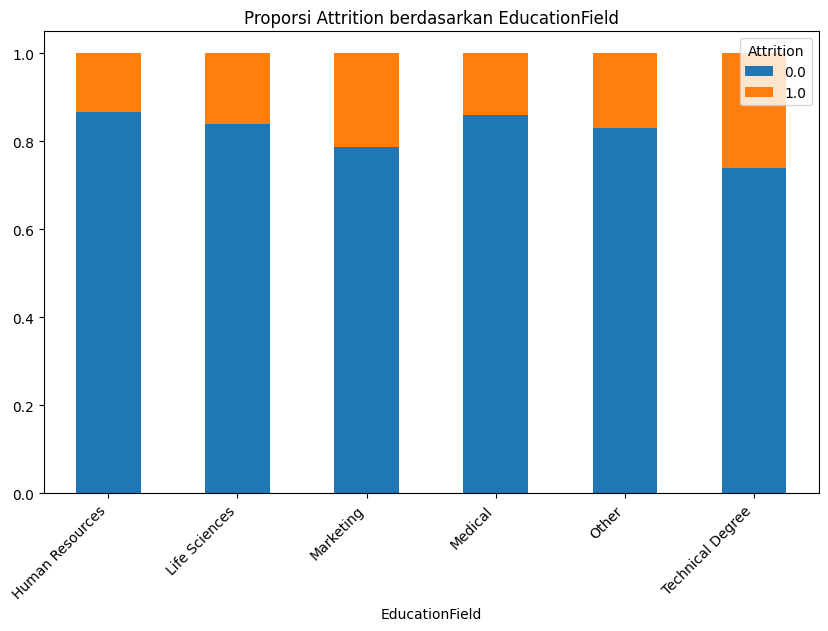

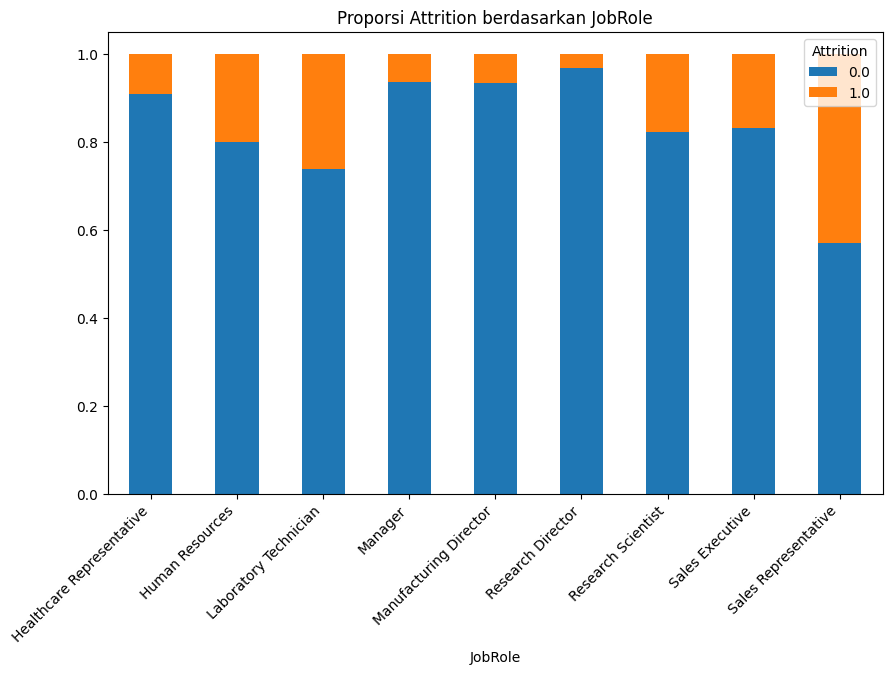

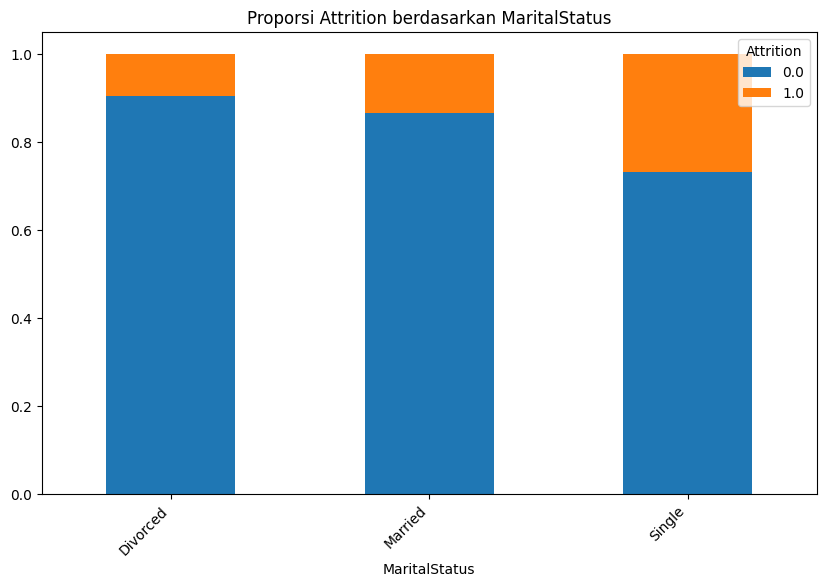

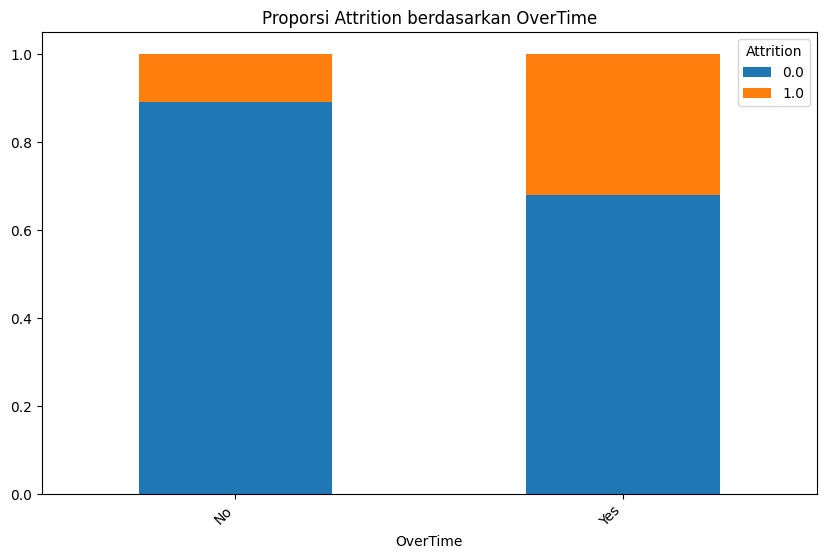

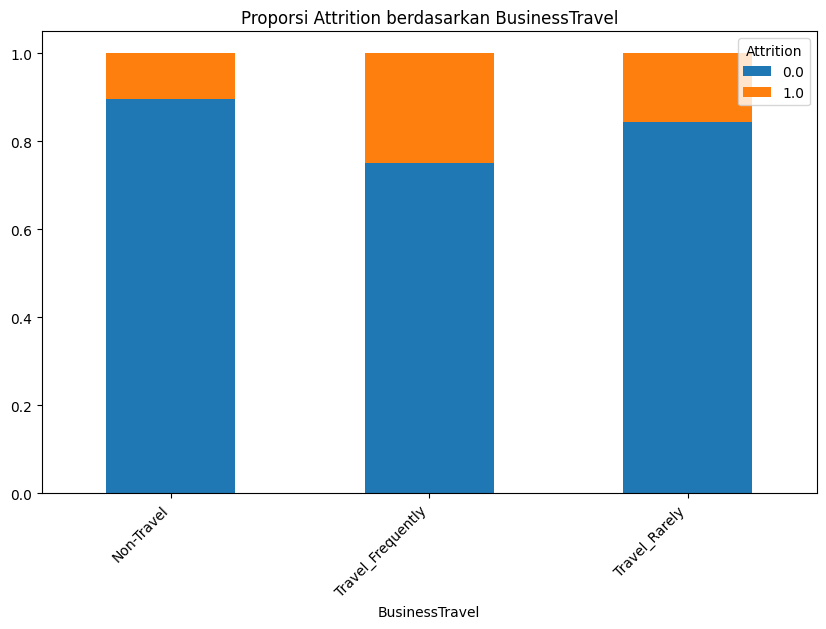

In [16]:
for feature in categorical_features:
    ct = pd.crosstab(df[feature], df['Attrition'])
    ct.div(ct.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Proporsi Attrition berdasarkan {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

## Data Preparation / Preprocessing
Mempersiapkan data untuk proses modeling.

### Penanganan Missing Value

In [17]:
# Mengisi missing value pada Attrition dengan modus karena merupakan fitur kategorikal
df['Attrition'].fillna(df['Attrition'].mode()[0], inplace=True)

<ipython-input-17-4d8b92a76c02>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attrition'].fillna(df['Attrition'].mode()[0], inplace=True)


### Encoding Fitur Kategorikal

 **Alasan Pemilihan Metode Encoding:**

  * **Label Encoding:** Digunakan untuk fitur kategorikal ordinal (memiliki urutan), seperti Education dan JobLevel.
  * **One-Hot Encoding:** Digunakan untuk fitur kategorikal nominal (tidak memiliki urutan), seperti Department dan JobRole, untuk menghindari model salah menginterpretasikan urutan.

In [18]:
# Membuat objek LabelEncoder
encoder = LabelEncoder()

# Melakukan encoding pada kolom kategorikal
for column in ['Department', 'EducationField', 'Gender', 'MaritalStatus', 'Over18', 'OverTime', 'BusinessTravel']:
    df[column] = encoder.fit_transform(df[column])

# One-Hot Encoding untuk JobRole
df = pd.get_dummies(df, columns=['JobRole'], prefix='JobRole')

### Feature Scaling:

In [19]:
# Membuat objek StandardScaler
scaler = StandardScaler()

# Melakukan scaling pada kolom numerik
numerical_features = ['Age', 'MonthlyIncome', 'DistanceFromHome'] # Ganti dengan kolom numerik lainnya
df[numerical_features] = scaler.fit_transform(df[numerical_features]) #Changed df_employee to df to reflect current dataframe

### Feature Engineering

**Alasan Pemilihan Fitur:**
  
  * **TotalWorkingYears_Company:** Fitur ini dibentuk untuk melihat perbedaan antara total pengalaman kerja dan lama bekerja di perusahaan. Perbedaan yang besar bisa mengindikasikan karyawan sering berpindah kerja.
  * **Income_Distance:** Fitur ini menggabungkan informasi pendapatan dan jarak rumah. Karyawan dengan pendapatan rendah dan jarak rumah jauh mungkin lebih rentan untuk resign.

In [20]:
# Contoh Feature Engineering: Total Working Years di Perusahaan
df['TotalWorkingYears_Company'] = df['TotalWorkingYears'] - df['YearsAtCompany']

# Contoh Feature Engineering: Interaksi Antar Fitur
df['Income_Distance'] = df['MonthlyIncome'] * df['DistanceFromHome']

In [50]:
# Menyimpan dataset yang sudah diproses
df.to_csv('employee_data_processed.csv', index=False)

## Modeling
Tujuan: Membangun model machine learning untuk memprediksi attrition.

**Model yang Digunakan:**
1. Logistic Regression
2. Support Vector Machine (SVM)
3. XGBoost
4. Random Forest

**Alasan Pemilihan Model:**
- **Logistic Regression:** Model dasar yang mudah diinterpretasi dan cocok untuk prediksi biner.
- **SVM:** Efektif untuk data berdimensi tinggi dan kompleks.
- **XGBoost:** Model ensemble yang kuat dan seringkali memberikan performa yang baik.
- **Random Forest:** Robust terhadap overfitting dan mampu menangani data dengan banyak fitur.

### Membagi Data

In [25]:
# Define X and y before using them in SMOTE
X = df.drop('Attrition', axis=1)  # Assuming 'df' is your DataFrame
y = df['Attrition']

# Now apply SMOTE
X, y = SMOTE().fit_resample(X, y)

# Feature Scaling
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Melatih Model

In [27]:
# Inisialisasi model-model
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(),
    'Random Forest': best_rf_model # Gunakan model hasil tuning
}

# Evaluasi dan perbandingan model
for name, model in models.items():
    # The if condition to switch models is no longer needed.
    model.fit(X_train, y_train)
    y_pred = best_rf_model.predict(X_test) # Ganti dengan model terbaik
    print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       265
         1.0       0.93      0.92      0.93       252

    accuracy                           0.93       517
   macro avg       0.93      0.93      0.93       517
weighted avg       0.93      0.93      0.93       517

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       265
         1.0       0.93      0.92      0.93       252

    accuracy                           0.93       517
   macro avg       0.93      0.93      0.93       517
weighted avg       0.93      0.93      0.93       517

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       265
         1.0       0.93      0.92      0.93       252

    accuracy                           0.93       517
   macro avg       0.93      0.93      0.93       517
weighted avg       0.93      0.93      0.93       517

              preci

## Evaluation
Mengevaluasi performa model dan mengidentifikasi faktor-faktor penting.

### Classification Report, Confusion Matrix, dan Accuracy

In [28]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       265
         1.0       0.93      0.92      0.93       252

    accuracy                           0.93       517
   macro avg       0.93      0.93      0.93       517
weighted avg       0.93      0.93      0.93       517

[[248  17]
 [ 20 232]]
0.9284332688588007


### Feature Importance:

In [43]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(feature_importances)

print("Interpretasi Feature Importance:")
print("Fitur-fitur yang berada di posisi teratas, seperti OverTime, MonthlyIncome, dan TotalWorkingYears, memiliki pengaruh paling besar terhadap prediksi attrition.")
print("Misalnya, karyawan yang sering lembur (OverTime = Yes) cenderung memiliki probabilitas resign yang lebih tinggi.")

                              feature  importance
25                   StockOptionLevel    0.075785
9             EnvironmentSatisfaction    0.055417
14                    JobSatisfaction    0.054844
13                           JobLevel    0.048162
5                    DistanceFromHome    0.041043
12                     JobInvolvement    0.038504
16                      MonthlyIncome    0.035246
17                        MonthlyRate    0.034509
35      JobRole_Laboratory Technician    0.032151
1                                 Age    0.031822
0                          EmployeeId    0.031759
11                         HourlyRate    0.031633
6                           Education    0.031089
32               YearsWithCurrManager    0.030670
3                           DailyRate    0.030475
2                      BusinessTravel    0.028337
26                  TotalWorkingYears    0.027764
43                    Income_Distance    0.026509
23           RelationshipSatisfaction    0.026165


### Precision, Recall, F1-score, dan ROC Curve

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Precision: 0.7335766423357665
Recall: 0.7976190476190477
F1-score: 0.7642585551330798


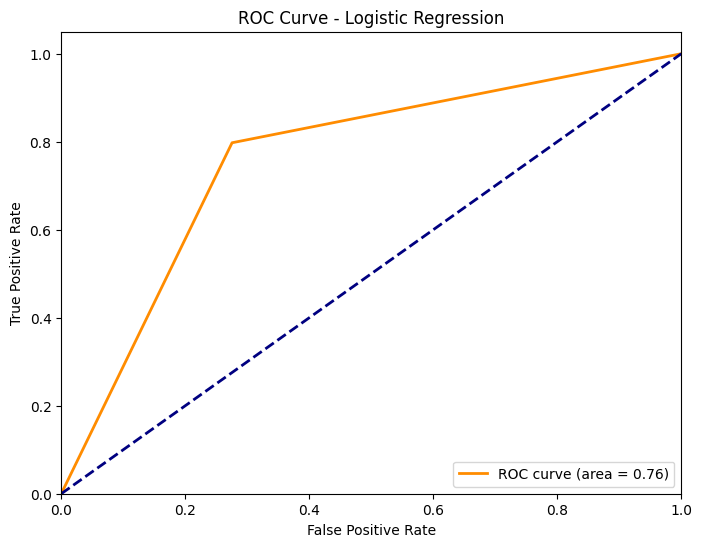

Model: SVM
Precision: 0.5296803652968036
Recall: 0.4603174603174603
F1-score: 0.49256900212314225


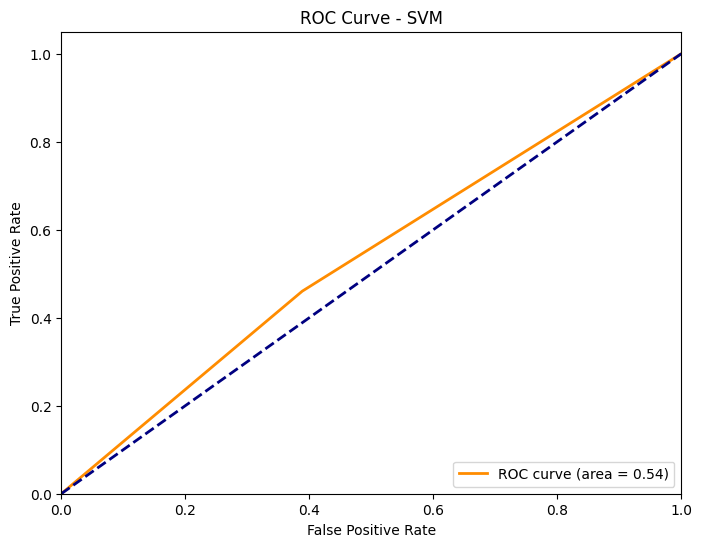

Model: XGBoost
Precision: 0.9414225941422594
Recall: 0.8928571428571429
F1-score: 0.9164969450101833


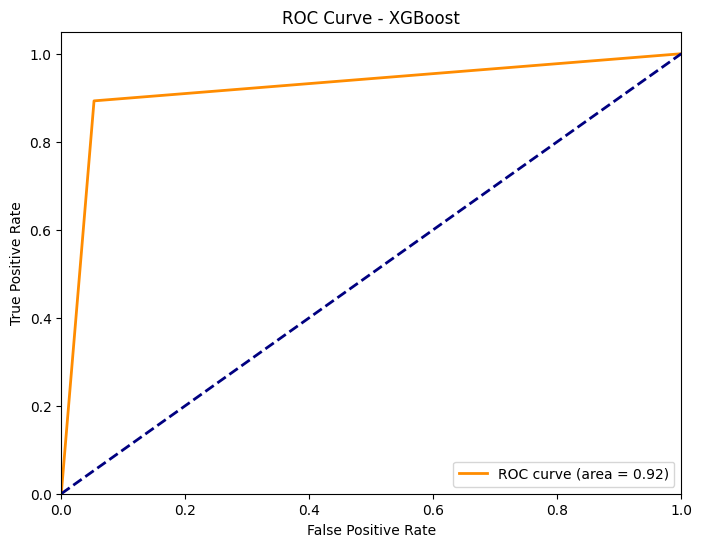

Model: Random Forest
Precision: 0.9317269076305221
Recall: 0.9206349206349206
F1-score: 0.9261477045908184


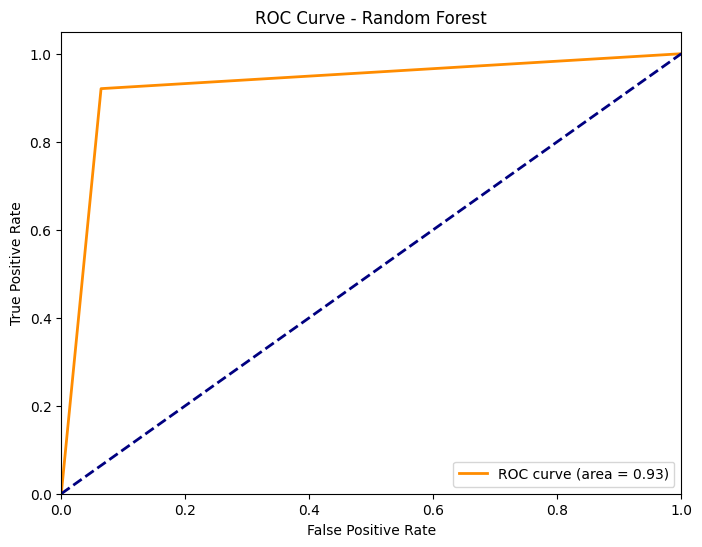

In [30]:
# Evaluasi dan perbandingan model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Menghitung precision, recall, dan F1-score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f'Model: {name}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1-score: {f1}')

    # Membuat ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()

#### Visual Perbandingan Model

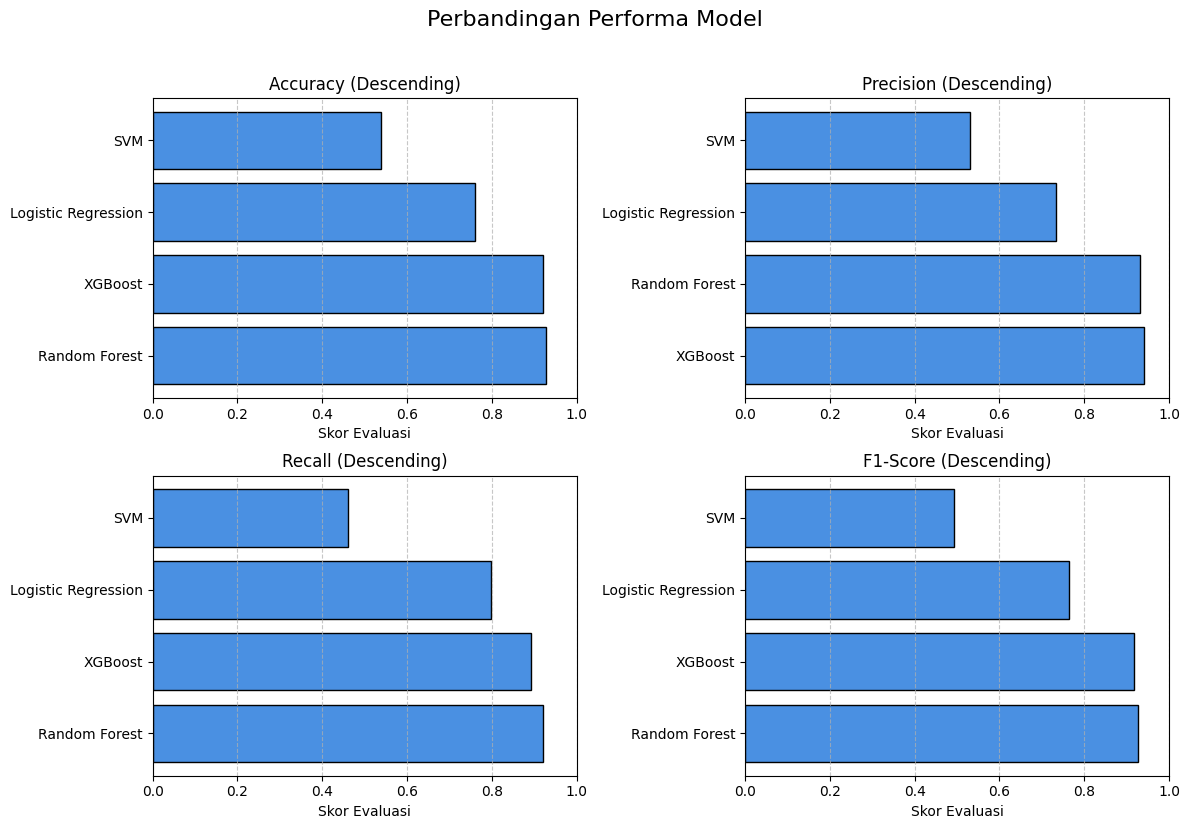

In [37]:
# Define an empty dictionary to store results
results_test = {}

# Calculate metrics for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    results_test[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

# Create a DataFrame for visualization
df_clean = pd.DataFrame([{'Model': name, **results_test[name]} for name in results_test])
results_df = df_clean.copy()

# Evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Canvas size
plt.figure(figsize=(12, 8))

# Loop for each metric
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)

    # Sort by current metric, descending (highest to lowest)
    sorted_df = results_df.sort_values(by=metric, ascending=False)

    # Create horizontal bar chart
    plt.barh(sorted_df['Model'], sorted_df[metric], color='#4A90E2', edgecolor='black')
    plt.title(f'{metric} (Descending)')
    plt.xlim(0, 1)
    plt.xlabel('Skor Evaluasi')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.suptitle('Perbandingan Performa Model', fontsize=16, y=1.03)
plt.subplots_adjust(top=0.92)
plt.show()

#### Pengaruh Semua Fitur

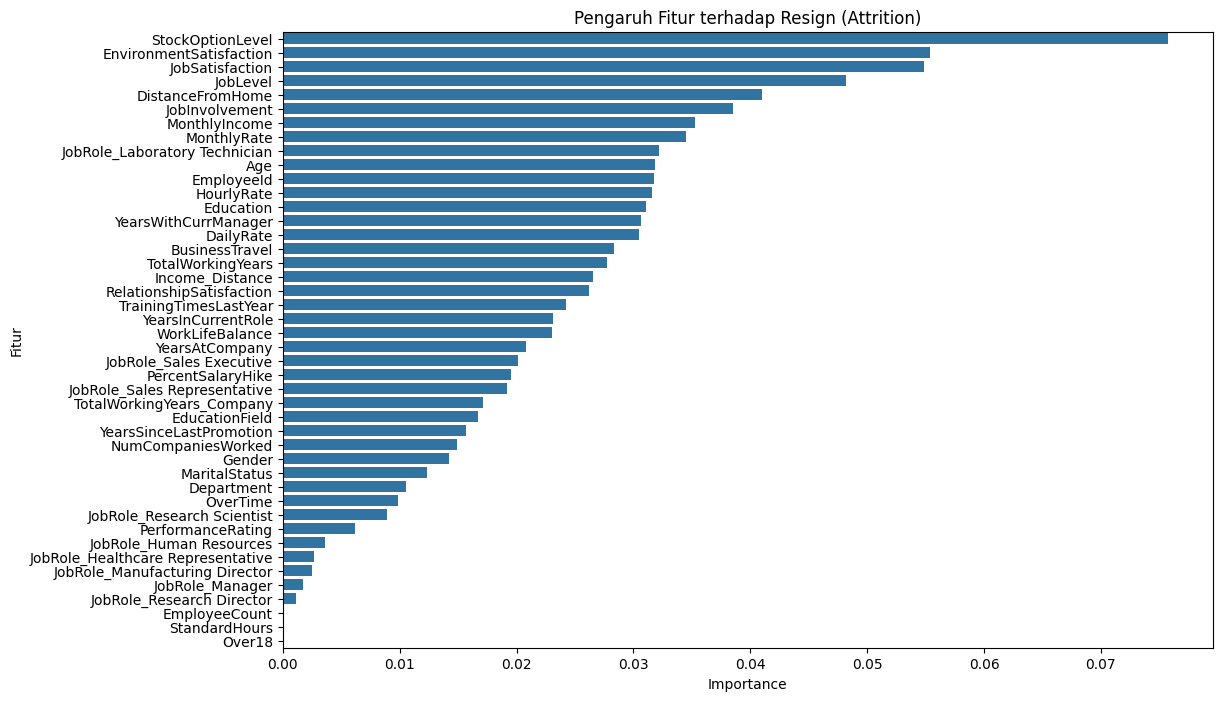

In [35]:
# Assuming 'model' is your best model
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Pengaruh Fitur terhadap Resign (Attrition)')
plt.xlabel('Importance')
plt.ylabel('Fitur')
plt.show()

#### Top 10 Faktor

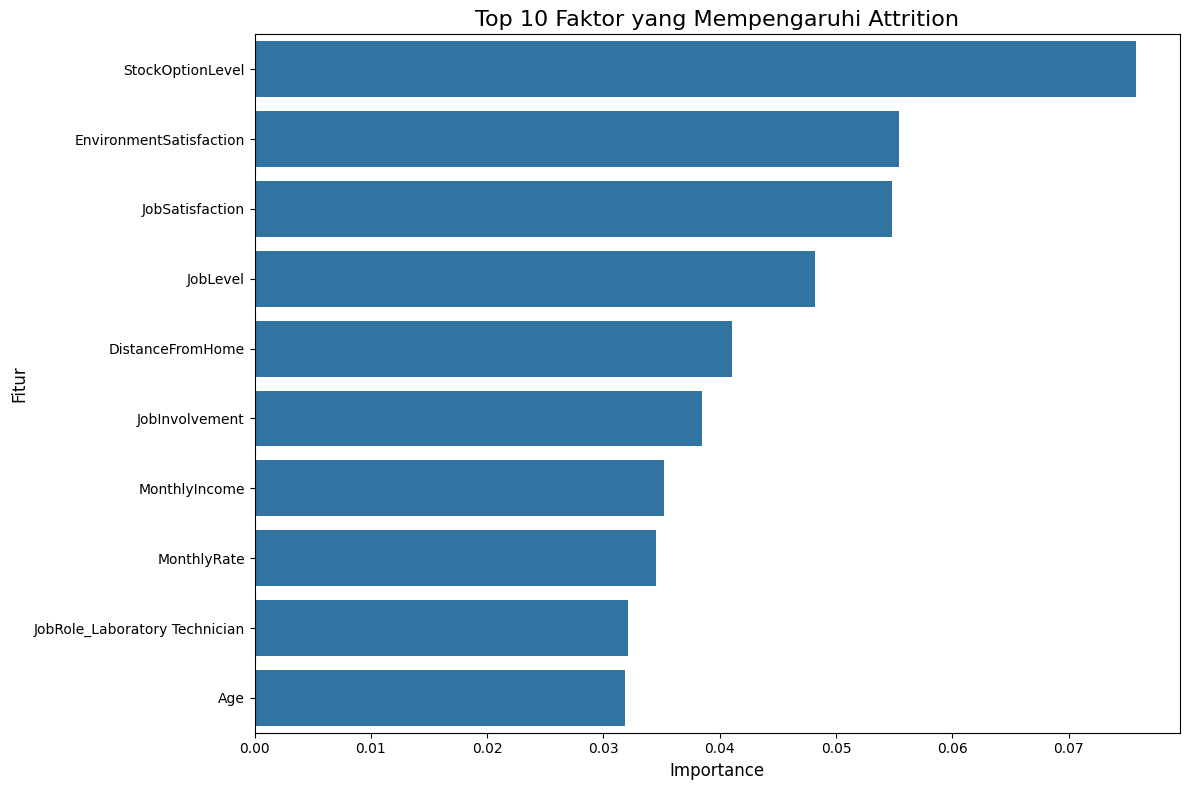

In [34]:
top_10_features = feature_importances.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=top_10_features, orient='h')
plt.title('Top 10 Faktor yang Mempengaruhi Attrition', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

## Menyimpan Model

In [45]:
# Membuat folder 'model' jika belum ada
if not os.path.exists('model'):
    os.makedirs('model')

# Menyimpan semua model ke dalam folder 'model'
for name, model in models.items():
    filename = os.path.join('model', f'{name}.pkl')
    joblib.dump(model, filename)

print("Semua model telah disimpan di folder 'model'")

Semua model telah disimpan di folder 'model'
